# Assignment 5.2: Visualize!

Grayson Hineline

Note for portfolio: The Assignment 5 projects involved just finding and visualizing some data in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 2.2: Some really nice plots

The following data is from a survey I conducted earlier this year for an Econometrics class. The purpose of the survey was to collect data on variables related to student accademic performance and working status. What I would like to do with this now is show visually the different GPA's of different majors of students.

In [2]:
surveydf = pd.read_csv("406projectdata.csv")
surveydf

,age,class,gpa,race,gender,familyinc,mothereduc,fathereduc,sat,highgpa,major,study,credits,hourswork,wwuemploy,wage,empurp
0,22,Senior,3.94,White,Male,"Over $200,000",Post Graduate,Post Graduate,1280.0,3.20,business,15-20 hours,13-17,0-10 hours,Yes,13.50,Choice
1,22,Senior,3.70,White,Female,"$75,000-$99,999","Some College, no degree","Some College, no degree",1100.0,3.86,humanities,15-20 hours,13-17,30-40 hours,Yes,16.70,Need
2,22,Senior,3.89,White,Female,"$100,000-$200,000",Associates Degree (2-year degree),Post Graduate,1540.0,3.70,science,15-20 hours,13-17,0 hours,NaN,NaN,NaN
3,25,Junior,3.00,mix,Female,"$75,000-$99,999",Post Graduate,"Some College, no degree",NaN,2.70,humanities,10-15 hours,13-17,10-20 hours,No,13.69,Choice
4,24,Senior,2.90,White,Male,"$100,000-$200,000",Associates Degree (2-year degree),Associates Degree (2-year degree),NaN,3.50,science,5-10 hours,8-12,10-20 hours,Yes,13.50,Choice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,18,Freshman,3.70,Asian,Female,"$100,000-$200,000",Bachelorâ€™s Degree (4-year degree),Less than a High School Diploma,1030.0,3.60,business,Less than 5 hours,13-17,10-20 hours,No,13.69,Choice
99,20,Junior,2.43,mix,Male,"$50,000-$74,999",Bachelorâ€™s Degree (4-year degree),Associates Degree (2-year degree),NaN,3.60,other,Less than 5 hours,13-17,0 hours,NaN,NaN,NaN
100,19,Freshman,3.30,White,Female,"$100,000-$200,000",Associates Degree (2-year degree),Bachelorâ€™s Degree (4-year degree),1190.0,3.70,business,5-10 hours,13-17,20-30 hours,No,15.00,Need
101,21,Senior,3.88,White,Male,"$100,000-$200,000",Bachelorâ€™s Degree (4-year degree),Bachelorâ€™s Degree (4-year degree),1440.0,4.00,business,15-20 hours,13-17,10-20 hours,Yes,13.69,Choice


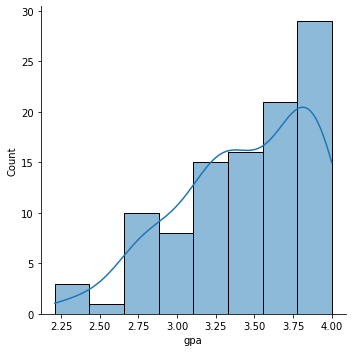

In [3]:
sns.displot(data = surveydf, x = 'gpa', kde = True)

I made the above plot to just see the distribution of student GPA in my survey for purposes of setting the scaling of the y axis later. This is not my plot I want to be graded.

In [4]:
surveydf["class"].unique()

array(['Senior', 'Junior', 'Sophomore', 'Freshman'], dtype=object)

In [5]:
surveydf['hourswork'].value_counts()

10-20 hours           36
0 hours               32
20-30 hours           11
0-10 hours            11
30-40 hours            9
More than 40 hours     4
Name: hourswork, dtype: int64

In [6]:
mask = (surveydf['hourswork'] == "0 hours") | (surveydf['hourswork'] == "0-10 hours")

In [7]:
def changeHoursWork(row):
    if (row == "0-10 hours") | (row == "0 hours"):
        return "Little or no work"
    else:
        return "Working student"

In [8]:
def changeclass(row):
    if (row == "Freshman") | (row == "Sophomore"):
        return "Underclassmen"
    else:
        return row

In [9]:
surveydf['hourswork'] = surveydf['hourswork'].apply(changeHoursWork)
surveydf['class'] = surveydf['class'].apply(changeclass)
surveydf

,age,class,gpa,race,gender,familyinc,mothereduc,fathereduc,sat,highgpa,major,study,credits,hourswork,wwuemploy,wage,empurp
0,22,Senior,3.94,White,Male,"Over $200,000",Post Graduate,Post Graduate,1280.0,3.20,business,15-20 hours,13-17,Little or no work,Yes,13.50,Choice
1,22,Senior,3.70,White,Female,"$75,000-$99,999","Some College, no degree","Some College, no degree",1100.0,3.86,humanities,15-20 hours,13-17,Working student,Yes,16.70,Need
2,22,Senior,3.89,White,Female,"$100,000-$200,000",Associates Degree (2-year degree),Post Graduate,1540.0,3.70,science,15-20 hours,13-17,Little or no work,NaN,NaN,NaN
3,25,Junior,3.00,mix,Female,"$75,000-$99,999",Post Graduate,"Some College, no degree",NaN,2.70,humanities,10-15 hours,13-17,Working student,No,13.69,Choice
4,24,Senior,2.90,White,Male,"$100,000-$200,000",Associates Degree (2-year degree),Associates Degree (2-year degree),NaN,3.50,science,5-10 hours,8-12,Working student,Yes,13.50,Choice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,18,Underclassmen,3.70,Asian,Female,"$100,000-$200,000",Bachelorâ€™s Degree (4-year degree),Less than a High School Diploma,1030.0,3.60,business,Less than 5 hours,13-17,Working student,No,13.69,Choice
99,20,Junior,2.43,mix,Male,"$50,000-$74,999",Bachelorâ€™s Degree (4-year degree),Associates Degree (2-year degree),NaN,3.60,other,Less than 5 hours,13-17,Little or no work,NaN,NaN,NaN
100,19,Underclassmen,3.30,White,Female,"$100,000-$200,000",Associates Degree (2-year degree),Bachelorâ€™s Degree (4-year degree),1190.0,3.70,business,5-10 hours,13-17,Working student,No,15.00,Need
101,21,Senior,3.88,White,Male,"$100,000-$200,000",Bachelorâ€™s Degree (4-year degree),Bachelorâ€™s Degree (4-year degree),1440.0,4.00,business,15-20 hours,13-17,Working student,Yes,13.69,Choice


In [10]:
surveydf['class'].value_counts()

Senior           56
Junior           28
Underclassmen    19
Name: class, dtype: int64

*Note: I grouped all of freshman and sophomores together because there were only 19 of them total, compared to 28 juniors and 56 seniors.*

In [11]:
#finding mean gpa for all working and non-working students
allStudentRows = surveydf.groupby('hourswork').mean().reset_index()[['hourswork', 'gpa']]
allStudentRows["class"] = ["All Students", "All Students"]
allStudentRows

,hourswork,gpa,class
0,Little or no work,3.508837,All Students
1,Working student,3.393500,All Students


In [12]:
#finding mean gpa by groupings
plotdata = surveydf.groupby(['hourswork','class']).mean().reset_index()[['hourswork', 'class', 'gpa']]
plotdata

,hourswork,class,gpa
0,Little or no work,Junior,3.528333
1,Little or no work,Senior,3.407143
2,Little or no work,Underclassmen,3.699000
3,Working student,Junior,3.190625
4,Working student,Senior,3.436000
5,Working student,Underclassmen,3.588889


In [13]:
#adding the two together such that they can be plotted together
plotdata = plotdata.append(other = allStudentRows, ignore_index = True)
plotdata

,hourswork,class,gpa
0,Little or no work,Junior,3.528333
1,Little or no work,Senior,3.407143
2,Little or no work,Underclassmen,3.699000
3,Working student,Junior,3.190625
4,Working student,Senior,3.436000
5,Working student,Underclassmen,3.588889
6,Little or no work,All Students,3.508837
7,Working student,All Students,3.393500


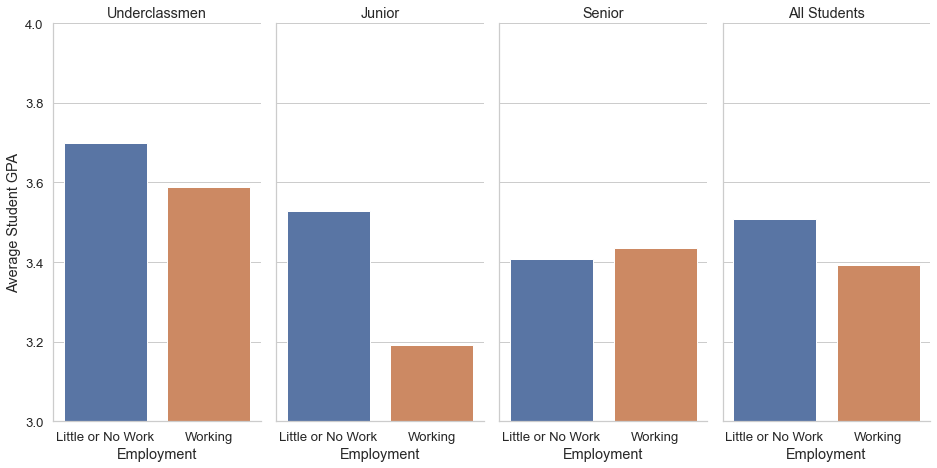

In [14]:
sns.set_theme(style = "whitegrid", font_scale = 1.2)
plot = sns.catplot(data = plotdata, 
                   x = "hourswork", y = "gpa",
                   col = "class", kind = 'bar', height = 6.5, aspect = 0.5, 
                   col_order = ["Underclassmen", "Junior", "Senior", "All Students"])

plot.set(ylim = (3.0, 4.0))
plot.set_xticklabels(["Little or No Work", "Working"])
plot.set_titles("{col_name}")
plot.set_ylabels("Average Student GPA")
plot.set_xlabels("Employment")

My goal for this plot was to 

Given that this dataset had data for the GPA’s of Western Students, their class standing, and their employment status, I created this plot to show the difference in average GPA between WWU students who work less than 10 hours per week or not at all (“Little or no Work”) and students who work more than 10 hours per week (“Working”), and see how those differences compare across different classes of students (“Underclassmen”, “Junior”, etc.).

Things to notice in the data:
-	Underclassmen have generally higher GPA’s than all other students, and this is likely due to the timing of this survey (I conducted this survey in Spring of 2021, meaning all of the freshman and sophomore students had up to that point done all of their classes in an online, pass/fail format).
-	Other than among seniors, students who work more than 10 hours have higher average GPAs. 
-	Among students surveyed, juniors had the largest difference in average GPA between working and non-working students.

Design Choices:
-	I chose to do a catplot of bar charts because I wanted to be able to clearly see the differences in average GPA between working and non-working students across different class standings. Showing a distribution of GPA’s or doing boxplots could have been suitable for comparison across these categories, but I did not use them mostly because I desired simplicity when comparing *eight groups* against one another.
-	I changed the theme to “whitegrid” because it put uniform lines across my charts such that they could be easily compared, while not adding any color that may dampen the colors of the bars in comparison.
-	I changed the scaling on the y-axis (Average GPA) to be from 3.0-4.0 because I knew that the average GPA’s of all of my groups were closely grouped together around 3.2-3.8, so therefore plotting them on a scale of 0-4.0 would not reveal much difference in the differences between the categories of students. Why waste space on the charts by having the scale be from 0-4.0 when we know that all the groups have average GPA’s above 3.0? However, one problem with me changing the scale could be the increasing of my lie factor. By making the y-axis scale so small, the size of the difference in the height of the bars may not be very proportional to the relative size of the difference in my data. That being said, I stand by the decision because it allows for the differences between the categories to be more clearly seen by the viewer, despite how small they are.
